In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset_dir = "/content/drive/MyDrive/ucsd/2022/spring/cse291/COVID19 Sera Data/"

In [ ]:
df = pd.read_csv(dataset_dir + "important_variant_peptides.tsv", sep="\t")

In [ ]:
df

,maestro_column_variant,patient_id,y_covid,variant_ccms_row_70252,variant_ccms_row_70224,variant_ccms_row_70246,variant_ccms_row_42797,variant_ccms_row_10133,variant_ccms_row_6744,variant_ccms_row_72191,...,variant_ccms_row_43385,variant_ccms_row_73517,variant_ccms_row_9615,variant_ccms_row_57100,variant_ccms_row_89047,variant_ccms_row_63818,variant_ccms_row_96756,variant_ccms_row_54896,variant_ccms_row_53501,variant_ccms_row_40058
0,_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for...,HC1,0,0.221872,1.524973,0.521797,2.287542,0.585327,0.000000,0.389748,...,0.070137,0.638102,0.135000,3.544477,0.000000,0.105644,0.143525,1.104631,0.283160,0.358924
1,_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_f...,HC10,0,0.620541,0.765736,0.771675,3.168297,0.634097,0.868488,1.325422,...,0.115440,1.380685,0.337143,2.105151,0.194562,0.086221,0.497956,1.801040,0.057826,0.156217
2,_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_f...,HC12,0,0.124841,0.909745,0.413016,0.274528,0.638015,0.418480,0.051639,...,0.056459,0.071696,0.181228,0.124468,0.098407,0.140286,0.087946,0.858310,0.049611,0.107903
3,_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_f...,HC13,0,0.307739,0.364249,0.179029,0.353590,0.305801,1.115922,0.115356,...,0.076735,0.135240,0.191112,0.220319,0.123784,0.069492,0.116262,0.661240,0.045577,0.117254
4,_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_f...,HC17,0,0.898199,1.944446,0.669398,0.627867,0.733261,0.624247,0.270939,...,0.205009,0.780187,0.141623,0.646114,0.332367,0.203421,0.000000,1.238651,0.626800,0.685249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,_dyn_#Symptomatic-non-COVID-19.JBDZ5.Symptomat...,JBDZ5,0,0.017284,7.067412,0.142291,0.171700,0.857866,0.371860,0.049932,...,0.051355,0.065978,0.845604,0.050432,0.100490,0.058056,0.079540,0.451365,0.628940,0.274478
79,_dyn_#Symptomatic-non-COVID-19.JBDZ6.Symptomat...,JBDZ6,0,0.011112,5.621560,0.096833,0.079235,1.680314,0.200864,0.053263,...,0.011872,0.085513,1.547744,0.047459,0.050922,0.241873,0.258377,0.330645,1.064563,0.588977
80,_dyn_#Symptomatic-non-COVID-19.JBDZ7.Symptomat...,JBDZ7,0,0.005851,5.262318,0.014645,0.748578,1.582022,0.000000,0.036659,...,0.054386,0.172897,0.243571,0.039268,0.183202,0.400589,0.036350,0.116908,0.036609,0.178160
81,_dyn_#Symptomatic-non-COVID-19.JBDZ8.Symptomat...,JBDZ8,0,0.023413,4.185061,0.086398,0.385558,0.690883,0.000000,0.014622,...,0.052263,0.150494,0.118828,0.044883,0.465654,0.072643,0.078978,0.244215,0.017419,0.135533


In [ ]:
cols = list(df.columns)
cols = cols[3:]
cols = [int(x.split("_")[-1]) - 1 for x in cols]
cols

[70251,
 70223,
 70245,
 42796,
 10132,
 6743,
 72190,
 81335,
 57363,
 58282,
 81377,
 46199,
 60072,
 60815,
 67337,
 69788,
 43384,
 73516,
 9614,
 57099,
 89046,
 63817,
 96755,
 54895,
 53500,
 40057]

In [ ]:
prot = pd.read_csv(dataset_dir + "MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv", sep="\t")
prot

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (259) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,rowid,ccms_row_id,Algorithm,Filename,Cluster_index,Peptide,Unmodified_sequence,Charge,_dyn_#Intensity_for_cluster,_dyn_#Intensity_for_unmodified_sequence,...,PSP_site_match,DrugBank_drugs,Parent_mass,Num_PSP_Drugbank_events,Start_AA_1_based,End_AA_1_based,Num_spectra_for_cluster,Num_spectra_for_unmodified_sequence,Num_spectra_for_peptide_variant,Internal_ref_orig_intensity
0,1,1,.MODA.,specs_ms.mgf,960991,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V",.GARLIPEMDQIFTEVEMTTLEK.,4,36.905893,36.905893,...,NaN,NaN,1580.81,0,NaN,NaN,1,1,1,8.204159e+03
1,2,2,.MODA.,specs_ms.mgf,763982,"I.[304.207]FTEVEMTTLE(K,304.207).V",.FTEVEMTTLEK.,3,11.686782,11.686782,...,NaN,NaN,1934.91,0,NaN,NaN,1,2,2,4.936894e+05
2,3,3,.MSGFPLUS.,specs_ms.mgf,902201,K.[304.207]LYQPEYQEVSTEEQR.E,.LYQPEYQEVSTEEQR.,3,15.690234,15.690234,...,NaN,NaN,2203.09,0,NaN,NaN,5,6,6,1.951566e+05
3,4,4,.MSGFPLUS.,specs_ms.mgf,935503,"K.[304.207]AANSLEAFIFETQD(K,304.207).L",.AANSLEAFIFETQDK.,3,15.016824,15.016824,...,NaN,NaN,2292.24,0,NaN,NaN,3,4,4,2.877781e+06
4,5,5,.MODA.,specs_ms.mgf,297961,"R.[304.207]YSHDF(N,-56.985)FH.I",.YSHDFNFH.,3,33.768015,33.768015,...,NaN,NaN,1313.66,0,NaN,NaN,3,3,3,7.088440e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101456,101457,101457,.MODA.,specs_ms.mgf,480358,"K.[304.207]YLGE(E,-68.078)YV(K,304.207).A",.YLGEEYVK.,3,15.671927,14.867811,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1027.56,1,NaN,NaN,2,1072,2,2.338236e+04
101457,101458,101458,.MODA.,specs_ms.mgf,237950,"K.[304.207]YL(G,55.921)EEYV(K,304.207).A",.YLGEEYVK.,4,13.932377,14.867811,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1664.83,1,NaN,NaN,2,1072,2,5.700355e+04
101458,101459,101459,.MODA.,specs_ms.mgf,1037953,"K.{187.018}[304.207]YLGEEYV(K,304.207).A",.YLGEEYVK.,2,14.412538,14.867811,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1795.93,1,NaN,NaN,3,1072,3,3.027917e+05
101459,101460,101460,.MODA.,specs_ms.mgf,1022758,"R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A",.NTYEKYLGEEYVK.,3,13.872686,22.237222,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,2605.44,1,NaN,NaN,5,17,8,9.954486e+04


In [ ]:
prot = prot.iloc[cols, :]
prot

,rowid,ccms_row_id,Algorithm,Filename,Cluster_index,Peptide,Unmodified_sequence,Charge,_dyn_#Intensity_for_cluster,_dyn_#Intensity_for_unmodified_sequence,...,PSP_site_match,DrugBank_drugs,Parent_mass,Num_PSP_Drugbank_events,Start_AA_1_based,End_AA_1_based,Num_spectra_for_cluster,Num_spectra_for_unmodified_sequence,Num_spectra_for_peptide_variant,Internal_ref_orig_intensity
70251,70252,70252,.MODA.,specs_ms.mgf,899759,"K.[304.207]SLHTLFGD(K,330.707)L(C,57.021)TVA.T",.SLHTLFGDKLCTVA.,3,5.995260,84.641473,...,NaN,NaN,1464.810,0,NaN,NaN,23,101,23,4.243538e+06
70223,70224,70224,.MODA.,specs_ms.mgf,903374,"S.[236.123]LHTLFGD(K,304.207).L",.LHTLFGDK.,2,547.664950,30.827799,...,NaN,NaN,1470.830,0,NaN,NaN,30,529,30,4.999824e+04
70245,70246,70246,.MODA.,specs_ms.mgf,900378,"K.[304.207]SLHTLFGD(K,332.213)L(C,57.021)TVA.T",.SLHTLFGDKLCTVA.,3,5.104946,84.641473,...,NaN,NaN,1465.820,0,NaN,NaN,33,101,33,4.458327e+06
42796,42797,42797,.MODA.,specs_ms.mgf,339687,"R.{291.173}[304.207]ILGGHLDA(K,304.207).G",.ILGGHLDAK.,4,30.031670,15.017813,...,NaN,NaN,1823.120,0,NaN,NaN,13,1648,13,6.234900e+04
10132,10133,10133,.MODA.,specs_ms.mgf,212006,K.{21.982}[304.207]VSVFVPPR.D,.VSVFVPPR.,3,16.572948,12.776874,...,NaN,NaN,1226.720,0,NaN,NaN,14,614,14,2.441093e+05
6743,6744,6744,.MODA.,specs_ms.mgf,235996,K.[304.207]HIAEEADR.K,.HIAEEADR.,3,16.469601,16.469601,...,NaN,NaN,415.555,0,NaN,NaN,7,7,7,2.224032e+04
72190,72191,72191,.MODA.,specs_ms.mgf,669307,"K.[304.207](T,291.174)(C,57.021)VADESAEN(C,57....",.TCVADESAENCDK.,4,19.808784,14.274894,...,NaN,NaN,2398.170,0,NaN,NaN,13,8459,30,1.890585e+05
81335,81336,81336,.MODA.,specs_ms.mgf,986639,"K.[182.128]YTYETTLE(K,304.207).C",.YTYETTLEK.,2,6.639679,23.133590,...,NaN,NaN,1633.890,0,NaN,NaN,8,194,8,2.262217e+05
57363,57364,57364,.MODA.,specs_ms.mgf,475608,"K.[304.207]QTALVELV(K,229.166).H",.QTALVELVK.,3,NaN,17.152200,...,NaN,NaN,1533.980,0,NaN,NaN,1,4166,21,0.000000e+00
58282,58283,58283,.MODA.,specs_ms.mgf,1059051,"K.[304.207](K,304.207)QTALVELV(K,522.33)H(K,30...",.KQTALVELVKHK.,3,688.561859,83.042494,...,NaN,NaN,1886.200,0,NaN,NaN,11,209,11,1.782447e+04


In [ ]:
variant = df.iloc[:, 3:]
variant

,variant_ccms_row_70252,variant_ccms_row_70224,variant_ccms_row_70246,variant_ccms_row_42797,variant_ccms_row_10133,variant_ccms_row_6744,variant_ccms_row_72191,variant_ccms_row_81336,variant_ccms_row_57364,variant_ccms_row_58283,...,variant_ccms_row_43385,variant_ccms_row_73517,variant_ccms_row_9615,variant_ccms_row_57100,variant_ccms_row_89047,variant_ccms_row_63818,variant_ccms_row_96756,variant_ccms_row_54896,variant_ccms_row_53501,variant_ccms_row_40058
0,0.221872,1.524973,0.521797,2.287542,0.585327,0.000000,0.389748,0.000000,0.594220,1.237619,...,0.070137,0.638102,0.135000,3.544477,0.000000,0.105644,0.143525,1.104631,0.283160,0.358924
1,0.620541,0.765736,0.771675,3.168297,0.634097,0.868488,1.325422,0.000000,1.004231,1.889076,...,0.115440,1.380685,0.337143,2.105151,0.194562,0.086221,0.497956,1.801040,0.057826,0.156217
2,0.124841,0.909745,0.413016,0.274528,0.638015,0.418480,0.051639,0.000000,5.128071,3.342668,...,0.056459,0.071696,0.181228,0.124468,0.098407,0.140286,0.087946,0.858310,0.049611,0.107903
3,0.307739,0.364249,0.179029,0.353590,0.305801,1.115922,0.115356,0.000000,0.397327,0.861208,...,0.076735,0.135240,0.191112,0.220319,0.123784,0.069492,0.116262,0.661240,0.045577,0.117254
4,0.898199,1.944446,0.669398,0.627867,0.733261,0.624247,0.270939,1.239326,0.434968,0.237257,...,0.205009,0.780187,0.141623,0.646114,0.332367,0.203421,0.000000,1.238651,0.626800,0.685249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0.017284,7.067412,0.142291,0.171700,0.857866,0.371860,0.049932,0.000000,0.518904,20.907984,...,0.051355,0.065978,0.845604,0.050432,0.100490,0.058056,0.079540,0.451365,0.628940,0.274478
79,0.011112,5.621560,0.096833,0.079235,1.680314,0.200864,0.053263,0.000000,0.526770,12.528379,...,0.011872,0.085513,1.547744,0.047459,0.050922,0.241873,0.258377,0.330645,1.064563,0.588977
80,0.005851,5.262318,0.014645,0.748578,1.582022,0.000000,0.036659,0.232645,0.739473,0.000000,...,0.054386,0.172897,0.243571,0.039268,0.183202,0.400589,0.036350,0.116908,0.036609,0.178160
81,0.023413,4.185061,0.086398,0.385558,0.690883,0.000000,0.014622,0.106832,0.848246,0.000000,...,0.052263,0.150494,0.118828,0.044883,0.465654,0.072643,0.078978,0.244215,0.017419,0.135533


In [ ]:
impt = [(70251, 8),
 (70223, 7),
 (70245, 7),
 (42796, 5),
 (10132, 4),
 (6743, 4),
 (72190, 4),
 (81335, 3),
 (57363, 3),
 (58282, 3),
 (81377, 2),
 (46199, 2),
 (60072, 2),
 (60815, 2),
 (67337, 1),
 (69788, 1),
 (43384, 1),
 (73516, 1),
 (9614, 1),
 (57099, 1),
 (89046, 1),
 (63817, 1),
 (96755, 1),
 (54895, 1),
 (53500, 1),
 (40057, 1)]

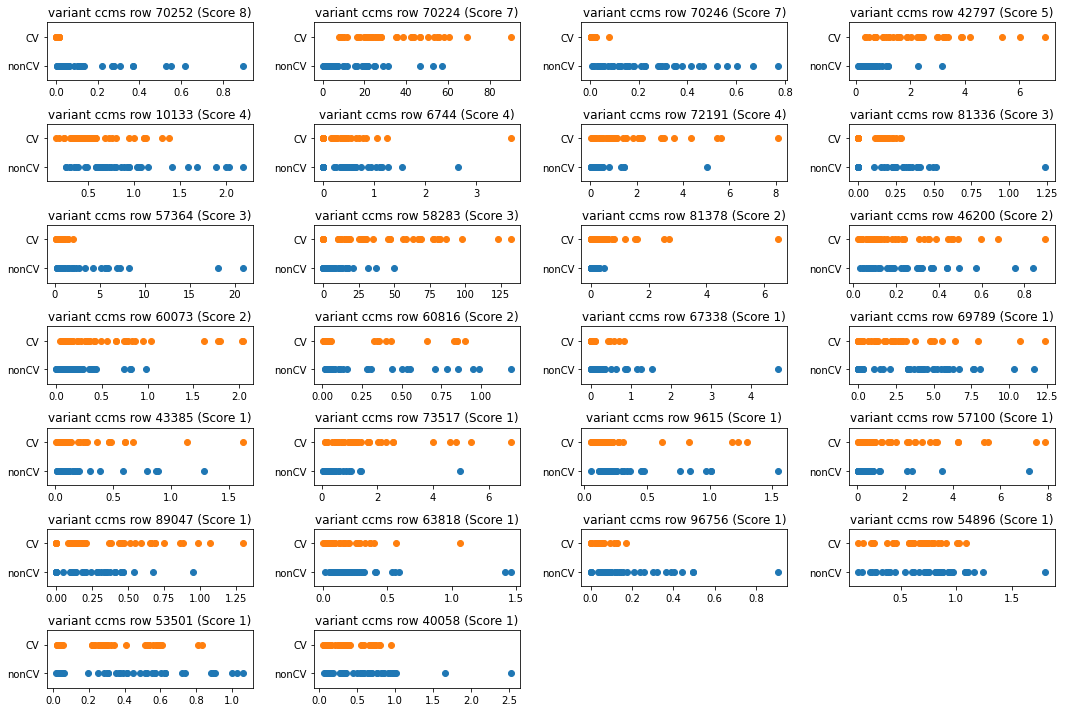

In [ ]:
fig, axs = plt.subplots(7, 4, figsize=(15, 10))
for i, col in enumerate(variant):
  ax = axs[i // 4][i % 4]
  # ax.figure(figsize=(5, 1))
  ax.set_title(f"variant ccms row {col.split('_')[-1]} (Score {impt[i][1]})")
  ax.scatter(variant[col][df["y_covid"] == 0], df["y_covid"][df["y_covid"] == 0])
  ax.scatter(variant[col][df["y_covid"] == 1], df["y_covid"][df["y_covid"] == 1])
  ax.set_yticks([0, 1])
  ax.set_yticklabels(["nonCV", "CV"])
  ax.set_ylim([-0.5, 1.5])
for ax in axs[-1][-2:]:
  ax.axis("off")
fig.tight_layout()
plt.show()

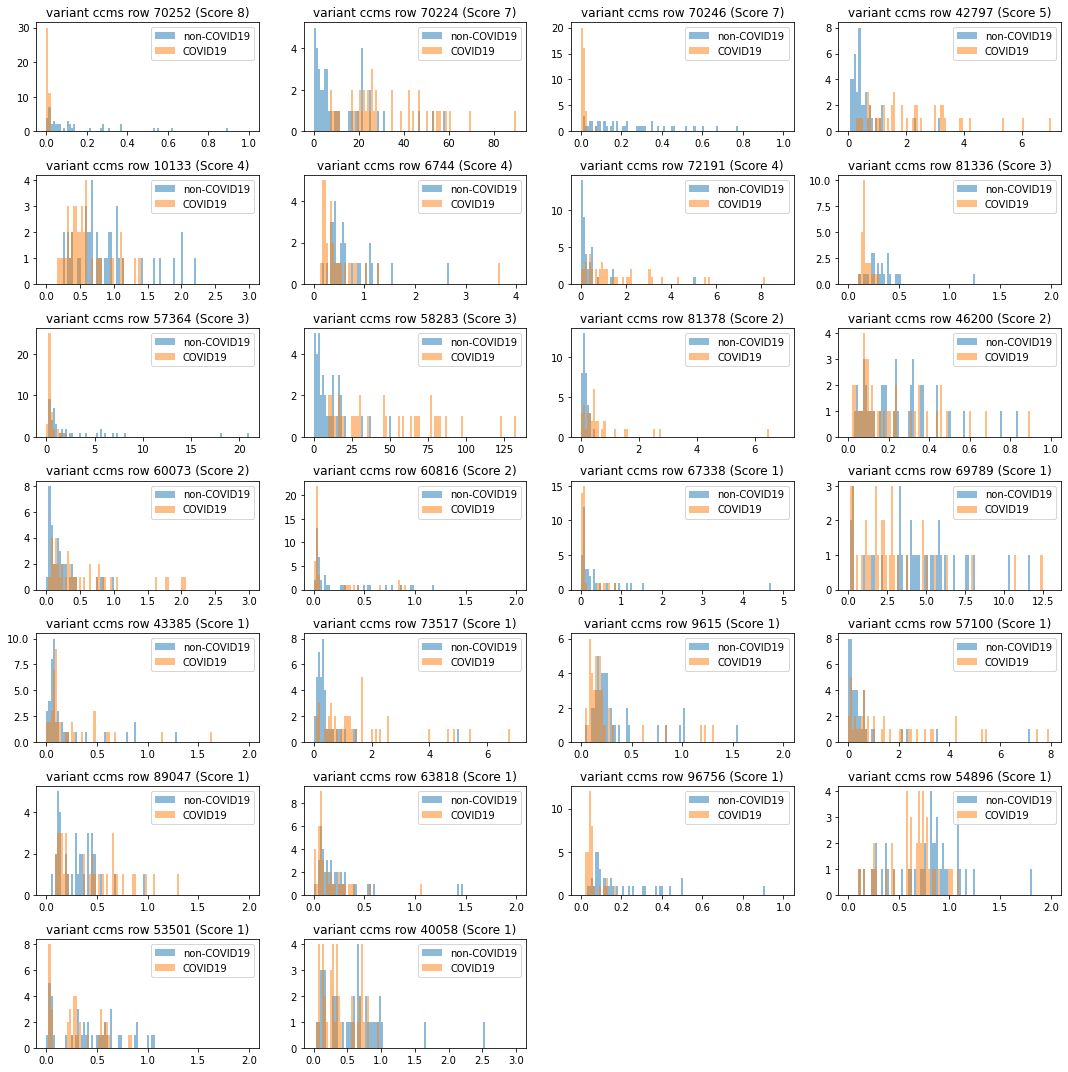

In [ ]:
fig, axs = plt.subplots(7, 4, figsize=(15, 15))
for i, col in enumerate(variant):
  ax = axs[i // 4][i % 4]
  non_covid = variant[col][df["y_covid"] == 0]
  non_covid = non_covid[non_covid != 0]
  covid = variant[col][df["y_covid"] == 1]
  covid = covid[covid != 0]
  min_range = int(min(non_covid.min(), covid.min()))
  max_range = int(np.ceil(max(non_covid.max(), covid.max())))
  bins = np.linspace(min_range, max_range, 100)
  ax.set_title(f"variant ccms row {col.split('_')[-1]} (Score {impt[i][1]})")
  ax.hist(non_covid, bins, alpha=0.5, label='non-COVID19')
  ax.hist(covid, bins, alpha=0.5, label='COVID19')
  ax.legend(loc='upper right')
for ax in axs[-1][-2:]:
  ax.axis("off")
fig.tight_layout()
plt.show()